In [2]:
!pip install arch
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 8.5 MB/s 


GARCH(2,2) model 

A(t) = E(t) sqrt(w + L(1)A(t-1)^2 + L(2) A(t-2)^2 + B(1)Sig(t-1)^2 + B(2)Sig(t-2)^2)

In [3]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol)
    series.append(new_val)

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

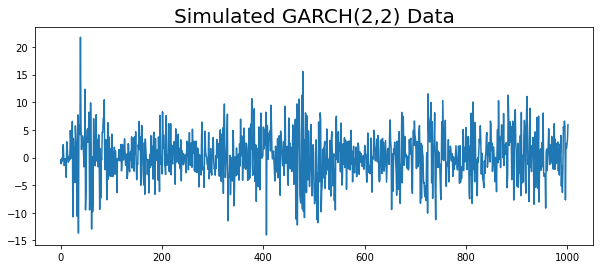

In [4]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

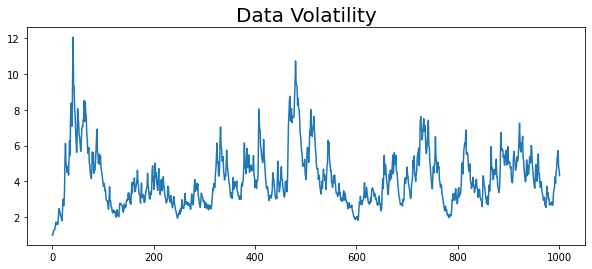

In [5]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

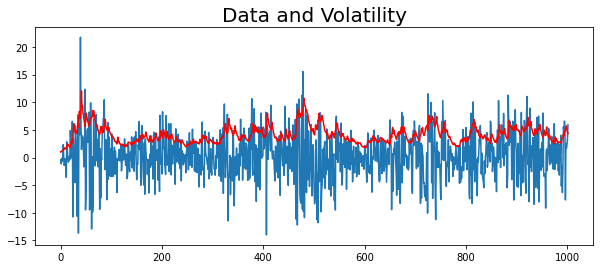

In [6]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

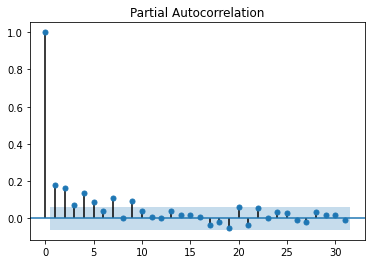

In [7]:
# From PACF we can say that our series PACF compeltely shuts off after 2 and we have a GARCH candidate for 2,2
plot_pacf(np.array(series)**2)
plt.show()

# Fit the GARCH Model

In [8]:
train, test = series[:-test_size], series[-test_size:]

In [9]:
model = arch_model(train, p=2, q=2)

In [10]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 27104.543172173493
Iteration:      2,   Func. Count:     17,   Neg. LLF: 789258.3300282003
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2589.8112798492907
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2550.5543633884317
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2510.3523406500426
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2506.5941857281928
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2968.5321680818965
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2503.6291082772987
Iteration:      9,   Func. Count:     75,   Neg. LLF: 2503.2220972279547
Iteration:     10,   Func. Count:     82,   Neg. LLF: 2503.2109258909304
Iteration:     11,   Func. Count:     89,   Neg. LLF: 2503.2102287996818
Iteration:     12,   Func. Count:     96,   Neg. LLF: 2503.2100740566057
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2503.2100740567257
Optimization terminated successfully    (Exit mode 0

In [11]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2503.21
Distribution:                  Normal   AIC:                           5018.42
Method:            Maximum Likelihood   BIC:                           5047.25
                                        No. Observations:                  902
Date:                Sun, Sep 18 2022   Df Residuals:                      901
Time:                        03:43:56   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0696      0.116      0.598      0.550 [ -0.158,  0.298]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.9573      0.353      2.715  6.629e-03   [  0.266,  1.648]
alpha[1]       0.1058  4.317e-02      2.451  1.426e-02 [2.119e-02,  0.190]
alpha[2]       0.1399  5.355e-02      2.611  9.016e-03 [3.489e-02,  0.245]
beta[1]        0.2647      0.129      2.050  4.040e-02 [1.158e-02,  0.518]
beta[2]        0.4472      0.109      4.085  4.409e-05   [  0.233,  0.662]
==========================================================================

Covariance estimator: robust
"""

# Predict

In [12]:
# horizon gives you an idea of how many periods in advance one like to predict the volatility for 
predictions = model_fit.forecast(horizon=test_size)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


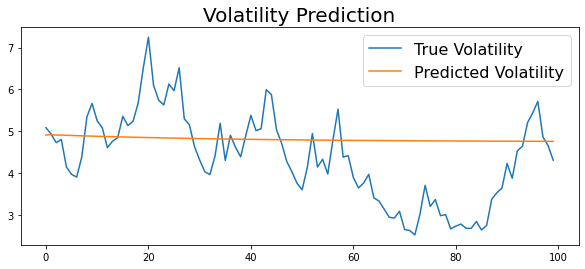

In [13]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :]))
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


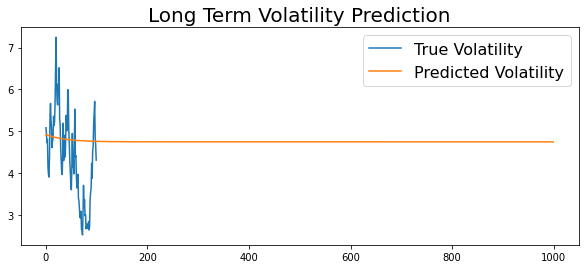

In [14]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

In [15]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

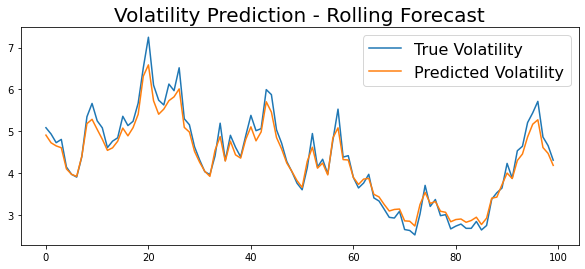

In [16]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# GARCH Stock Forecasting

In [6]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Getting the Data from YAHOO finance

In [20]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 9.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [1]:
import pandas_datareader
pandas_datareader.__version__  # Should show 0.10.0

'0.10.0'

Text(0.5, 1.0, 'DIS Returns')

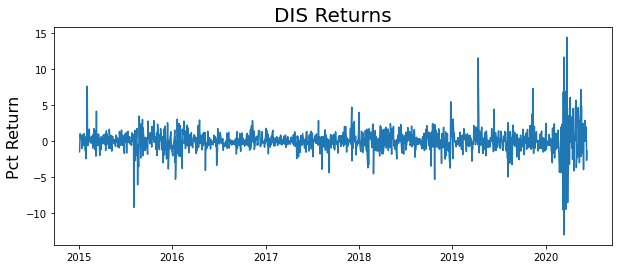

In [7]:
from datetime import datetime
import pandas_datareader.data as web
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

returns = 100 * dis.Close.pct_change().dropna()

plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

# PACF

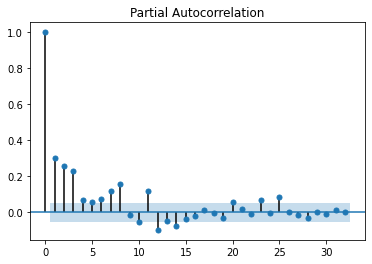

In [8]:
plot_pacf(returns**2)
plt.show()

# GARCH (3,3)

In [9]:
# If we look at the P value of Beta coefficients, none of them are significant as all the p values are greater than 0.05 
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 211297145435.1136
Iteration:      2,   Func. Count:     22,   Neg. LLF: 983187686.6394435
Iteration:      3,   Func. Count:     33,   Neg. LLF: 2732.2839564722976
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2486.188369315234
Iteration:      5,   Func. Count:     53,   Neg. LLF: 2323.1605931368404
Iteration:      6,   Func. Count:     63,   Neg. LLF: 2330.182247916406
Iteration:      7,   Func. Count:     73,   Neg. LLF: 2401.748206600305
Iteration:      8,   Func. Count:     83,   Neg. LLF: 2391.85347371648
Iteration:      9,   Func. Count:     93,   Neg. LLF: 2299.079965616726
Iteration:     10,   Func. Count:    102,   Neg. LLF: 2299.083237868365
Iteration:     11,   Func. Count:    112,   Neg. LLF: 2298.9516134212854
Iteration:     12,   Func. Count:    121,   Neg. LLF: 2298.9391230170268
Iteration:     13,   Func. Count:    130,   Neg. LLF: 2298.9239034639913
Iteration:     14,   Func. Count:    139,   Neg. LLF: 2298.9

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2298.92
Distribution:                  Normal   AIC:                           4613.84
Method:            Maximum Likelihood   BIC:                           4655.61
                                        No. Observations:                 1368
Date:                Sun, Sep 18 2022   Df Residuals:                     1367
Time:                        04:12:35   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.0139e-03  4.319e-02     -0.162      0.871 [-9.167e-02,7.764e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5417      0.189      2.860  4.231e-03    [  0.171,  0.913]
alpha[1]       0.0684  3.947e-02      1.733  8.314e-02 [-8.968e-03,  0.146]
alpha[2]       0.2032  9.867e-02      2.060  3.943e-02  [9.836e-03,  0.397]
alpha[3]       0.3177      0.152      2.096  3.604e-02  [2.068e-02,  0.615]
beta[1]        0.0000      0.162      0.000      1.000    [ -0.318,  0.318]
beta[2]    1.5341e-14  9.634e-02  1.592e-13      1.000    [ -0.189,  0.189]
beta[3]        0.2296      0.168      1.370      0.171 [-9.880e-02,  0.558]
===========================================================================

Covariance estimator: robust
"""

# GARCH (3,0)  = ARCH (3)

In [10]:
model = arch_model(returns, p=3, q=0)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 3359.6816259476745
Iteration:      2,   Func. Count:     16,   Neg. LLF: 8810.443317627338
Iteration:      3,   Func. Count:     24,   Neg. LLF: 2256855.02298939
Iteration:      4,   Func. Count:     31,   Neg. LLF: 576570.4714035667
Iteration:      5,   Func. Count:     38,   Neg. LLF: 15039.623636712518
Iteration:      6,   Func. Count:     45,   Neg. LLF: 2514.893164407934
Iteration:      7,   Func. Count:     52,   Neg. LLF: 2448.3488497386024
Iteration:      8,   Func. Count:     60,   Neg. LLF: 2314.879825146533
Iteration:      9,   Func. Count:     66,   Neg. LLF: 2314.2849180053518
Iteration:     10,   Func. Count:     72,   Neg. LLF: 2314.1439921690726
Iteration:     11,   Func. Count:     78,   Neg. LLF: 2314.077972605636
Iteration:     12,   Func. Count:     84,   Neg. LLF: 2314.0771981532744
Iteration:     13,   Func. Count:     90,   Neg. LLF: 2314.0771928631893
Iteration:     14,   Func. Count:     95,   Neg. LLF: 2314

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2314.08
Distribution:                  Normal   AIC:                           4638.15
Method:            Maximum Likelihood   BIC:                           4664.26
                                        No. Observations:                 1368
Date:                Sun, Sep 18 2022   Df Residuals:                     1367
Time:                        04:14:56   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.7995e-03  3.990e-02      0.246      0.806 [-6.841e-02,8.801e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8619      0.138      6.230  4.678e-10    [  0.591,  1.133]
alpha[1]       0.0886  4.530e-02      1.956  5.052e-02 [-2.021e-04,  0.177]
alpha[2]       0.2621  9.123e-02      2.873  4.060e-03  [8.334e-02,  0.441]
alpha[3]       0.3558      0.169      2.102  3.559e-02  [2.397e-02,  0.688]
===========================================================================

Covariance estimator: robust
"""

In [11]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

In [12]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

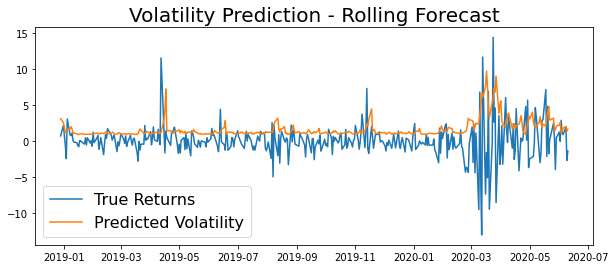

In [13]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [14]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [15]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [16]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

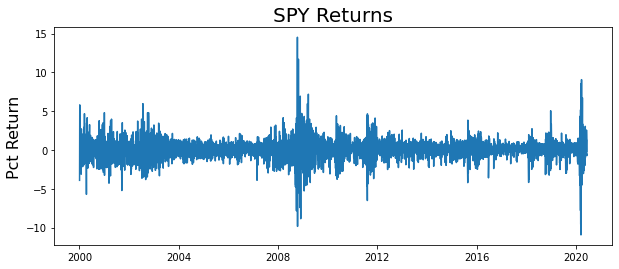

In [17]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

# PACF

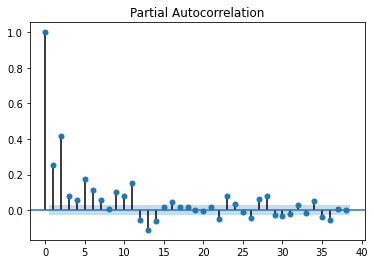

In [18]:
plot_pacf(returns**2)
plt.show()

# GARCH (2,2)

In [19]:
model = arch_model(returns, p=2, q=2)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 95620.69814392301
Iteration:      2,   Func. Count:     20,   Neg. LLF: 56371.80164298938
Iteration:      3,   Func. Count:     31,   Neg. LLF: 11215.314828394296
Iteration:      4,   Func. Count:     40,   Neg. LLF: 13888.451566168835
Iteration:      5,   Func. Count:     49,   Neg. LLF: 2135755861.8495898
Iteration:      6,   Func. Count:     57,   Neg. LLF: 7231.193566311684
Iteration:      7,   Func. Count:     65,   Neg. LLF: 7089.763990919695
Iteration:      8,   Func. Count:     73,   Neg. LLF: 7056.837955966228
Iteration:      9,   Func. Count:     82,   Neg. LLF: 7055.799793608061
Iteration:     10,   Func. Count:     90,   Neg. LLF: 7053.566838698662
Iteration:     11,   Func. Count:     97,   Neg. LLF: 7053.566735137116
Iteration:     12,   Func. Count:    103,   Neg. LLF: 7053.56673513466
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7053.566735137116
            Iterations: 12

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7053.57
Distribution:                  Normal   AIC:                           14119.1
Method:            Maximum Likelihood   BIC:                           14158.4
                                        No. Observations:                 5141
Date:                Sun, Sep 18 2022   Df Residuals:                     5140
Time:                        04:18:17   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.054  1.411e-09 [4.486e-02,8.782e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0407  9.930e-03      4.094  4.245e-05 [2.119e-02,6.011e-02]
alpha[1]       0.0809  2.203e-02      3.673  2.396e-04   [3.775e-02,  0.124]
alpha[2]       0.1331  3.037e-02      4.382  1.175e-05   [7.356e-02,  0.193]
beta[1]        0.2976      0.293      1.014      0.310     [ -0.277,  0.873]
beta[2]        0.4592      0.258      1.777  7.563e-02  [-4.739e-02,  0.966]
============================================================================

Covariance estimator: robust
"""

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex

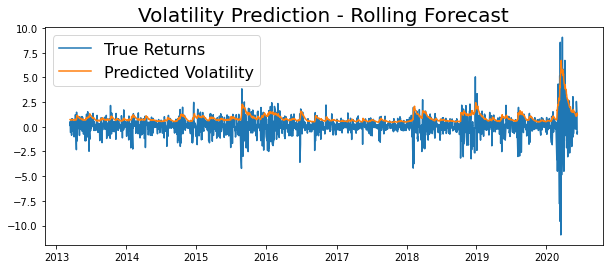

In [20]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to Use the Model

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

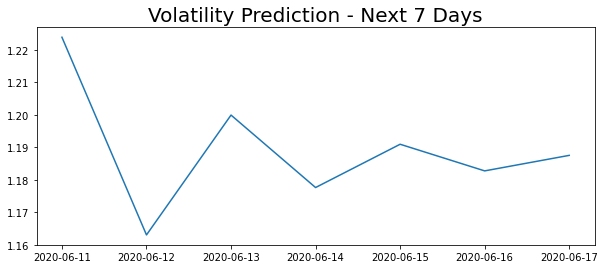

In [21]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)